In [2]:
import os
import numpy as np
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from keras.applications.vgg16 import VGG16
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
def input_data(folder_path, output_data): 
  for dirs in os.listdir(folder_path):
    class_name = dirs
    new_path = os.path.join(folder_path, class_name)
    for img in os.listdir(new_path):
      img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_GRAYSCALE)
      resize = cv.resize(img_arr, (128,128))
      output_data.append([resize, class_name])
  return output_data

In [4]:
train_data = input_data(r"melanoma_cancer_dataset\train", [])
test_data = input_data(r"melanoma_cancer_dataset\test", [])


In [5]:
np.random.shuffle(train_data)
np.random.shuffle(test_data)

In [6]:
train_images = []              
train_labels = []
for features, labels in train_data:
  train_images.append(features)
  train_labels.append(labels)

In [7]:
test_images = []   
test_labels = []
for features, labels in test_data:
  test_images.append(features)
  test_labels.append(labels)

In [8]:
label_enc = LabelEncoder()        
train_labels = label_enc.fit_transform(train_labels)
test_labels = label_enc.transform(test_labels)

In [9]:
train_images = np.array(train_images)    
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
train_images = train_images/255
test_images = test_images/255

In [11]:
train_images = np.expand_dims(train_images, axis=3)      
test_images = np.expand_dims(test_images, axis=3)

In [12]:
print(f"Shape of the train images {train_images.shape}")
print(f"Shape of the train labels {train_labels.shape}")
print(f"Shape of the test images {test_images.shape}")
print(f"Shape of the test labels {test_labels.shape}")

Shape of the train images (9605, 128, 128, 1)
Shape of the train labels (9605,)
Shape of the test images (1000, 128, 128, 1)
Shape of the test labels (1000,)


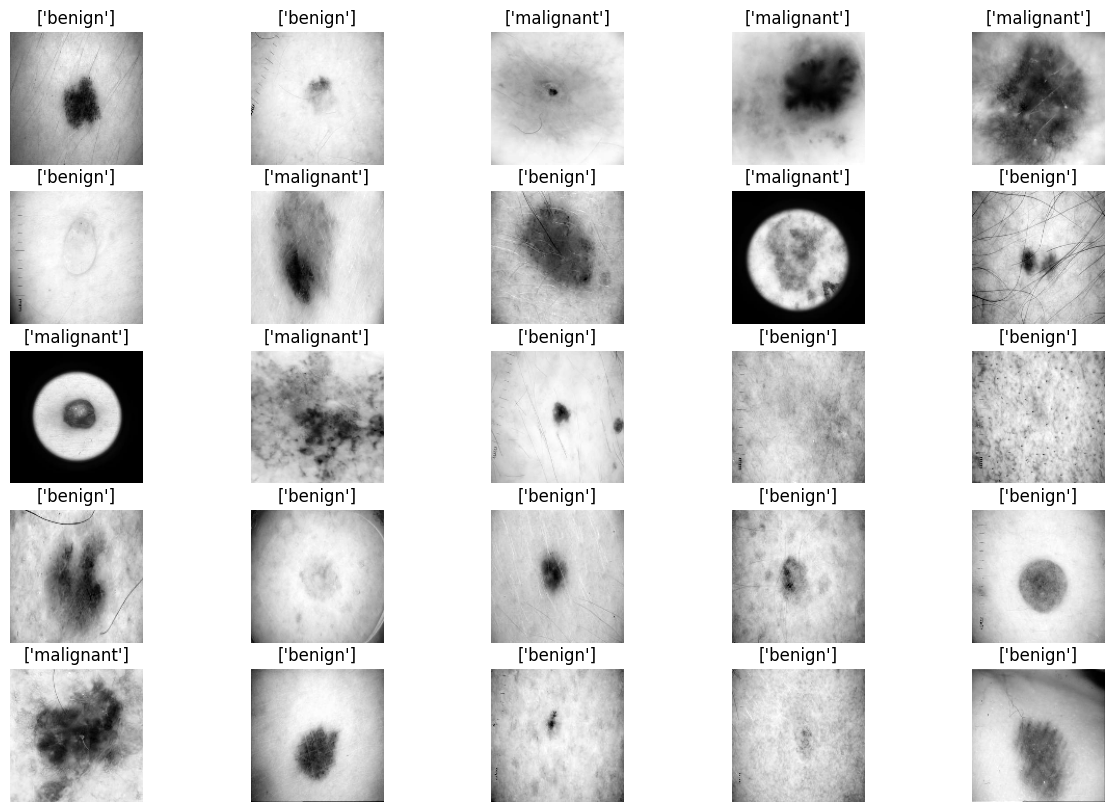

In [13]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(test_images[i], cmap='gray')
  plt.title(f"{label_enc.inverse_transform([test_labels[i]])}")
  plt.axis("off")

In [14]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=(128,128,1), activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(64, (3, 3), activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(128, (3, 3), activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(256, (3, 3), activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(256, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['accuracy'])

In [17]:
history1 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 119s 385ms/step - accuracy: 0.6635 - loss: 0.5802 - val_accuracy: 0.8630 - val_loss: 0.3097
Epoch 2/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 108s 359ms/step - accuracy: 0.8236 - loss: 0.3667 - val_accuracy: 0.8690 - val_loss: 0.2924
Epoch 3/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 109s 358ms/step - accuracy: 0.8478 - loss: 0.3309 - val_accuracy: 0.8740 - val_loss: 0.2845
Epoch 4/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 111s 365ms/step - accuracy: 0.8663 - loss: 0.2959 - val_accuracy: 0.8690 - val_loss: 0.2902
Epoch 5/5
301/301 ━━━━━━━━━━━━━━━━━━━━ 127s 419ms/step - accuracy: 0.8809 - loss: 0.2693 - val_accuracy: 0.8840 - val_loss: 0.2749


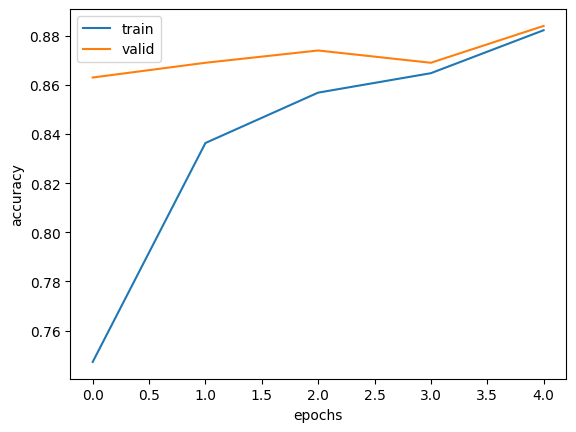

In [18]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","valid"])
plt.show()

In [19]:
y_pred1 = model1.predict(test_images)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


In [20]:
y_pred1 = np.where(y_pred1>0.6,1,0)
y_pred1 = y_pred1.reshape(1,-1)[0]
print(classification_report(y_pred1, test_labels))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       570
           1       0.81      0.94      0.87       430

    accuracy                           0.88      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.88      0.88      1000



<AxesSubplot: >

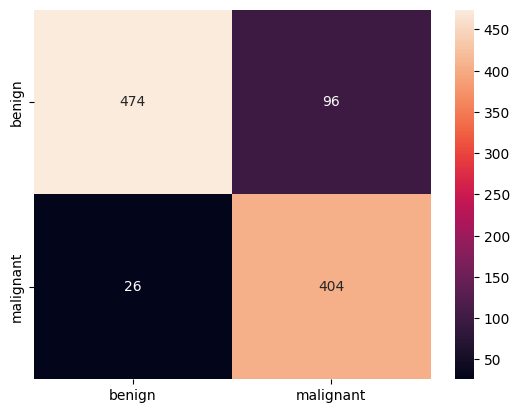

In [21]:
sns.heatmap(confusion_matrix(y_pred1, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])